In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('crop_recommendation.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nCrop Distribution:")
print(df['label'].value_counts())

Dataset Shape: (2200, 8)

First few rows:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), i

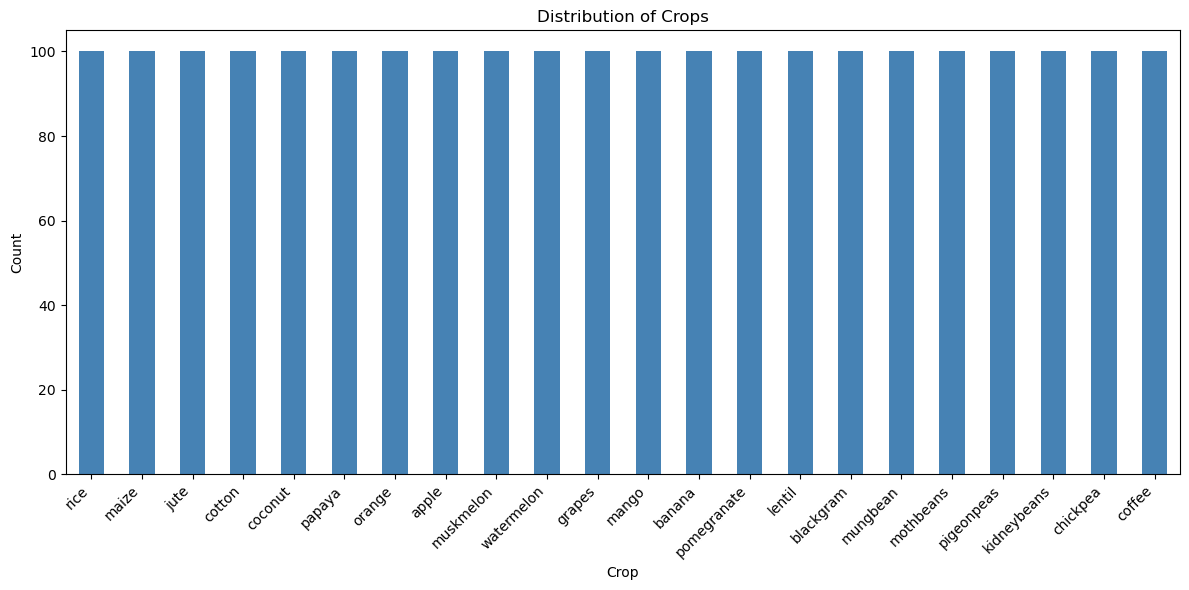

In [4]:
plt.figure(figsize=(12,6))
df['label'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Distribution of Crops')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

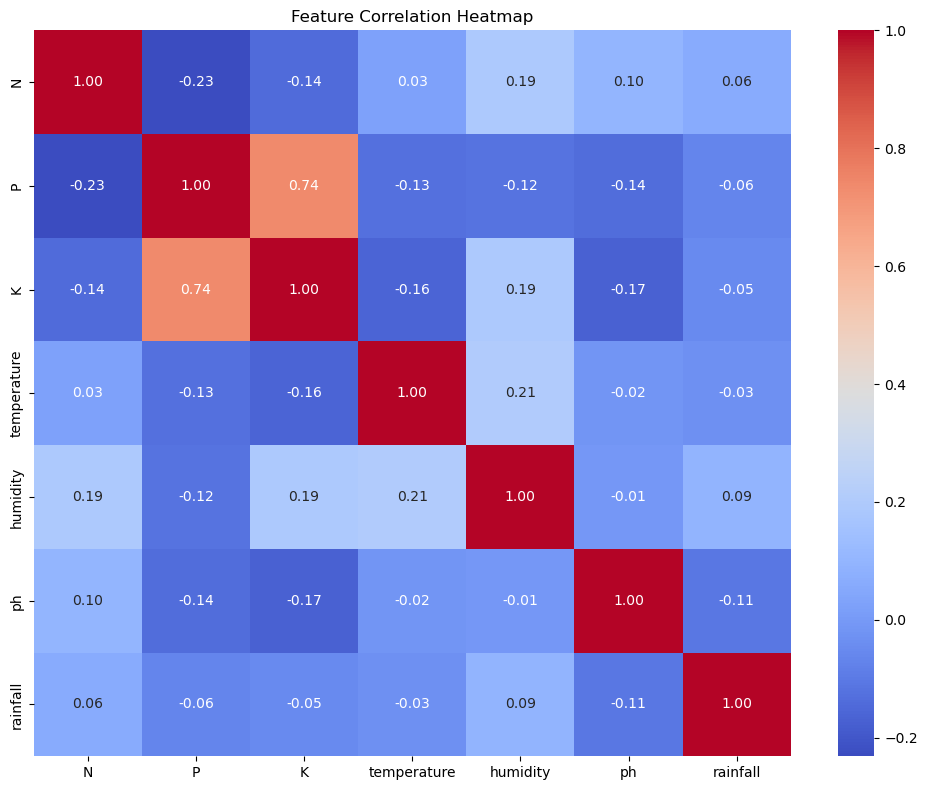

In [5]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

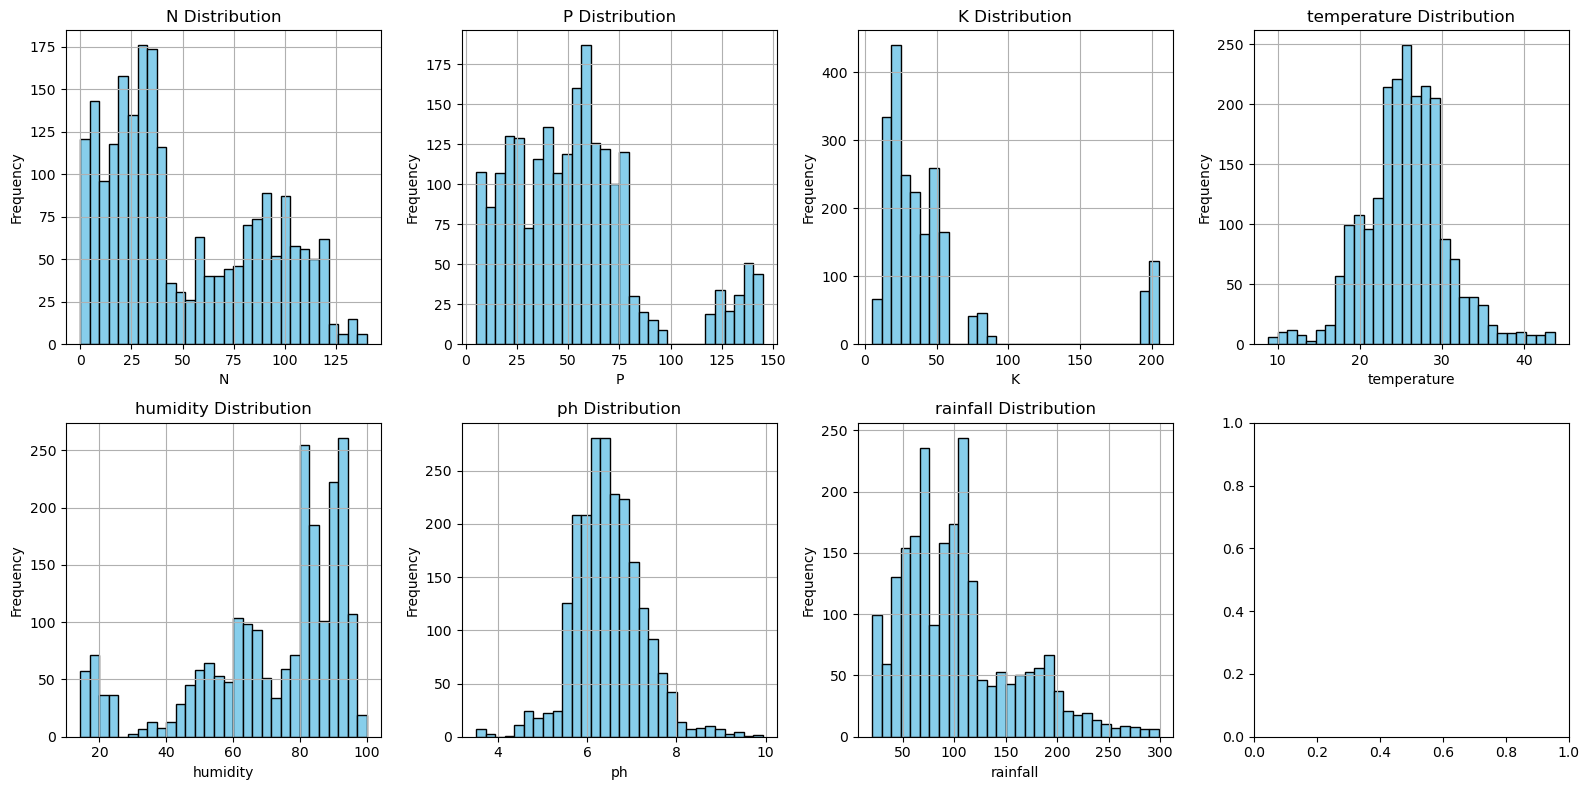

In [6]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
for idx, feature in enumerate(features):
    ax = axes[idx//4, idx%4]
    df[feature].hist(bins=30, ax=ax, color='skyblue', edgecolor='black')
    ax.set_title(f'{feature} Distribution')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [7]:
X = df.drop('label', axis=1)
y = df['label']
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (2200, 7)
Target shape: (2200,)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 1760
Testing set size: 440


In [14]:
scaler = StandardScaler()
X_trained_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=20, min_samples_split=5)
model.fit(X_trained_scaled, y_train)
print("Model training completed!")

Model training completed!


In [17]:
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Model Accuracy: 99.55%

Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00

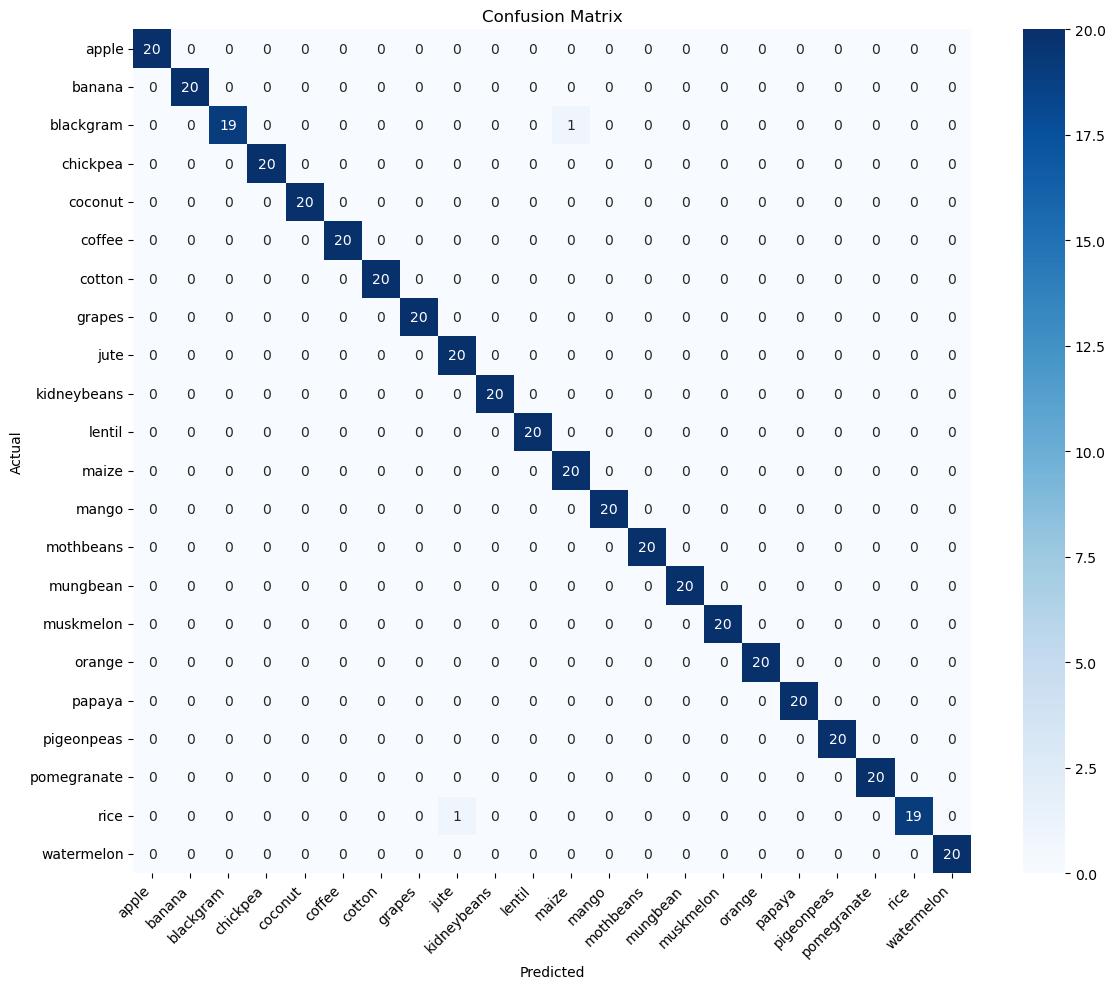

In [18]:
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Feature Importance:
       feature  importance
6     rainfall    0.230813
4     humidity    0.220642
2            K    0.173450
1            P    0.148794
0            N    0.104841
3  temperature    0.071205
5           ph    0.050255


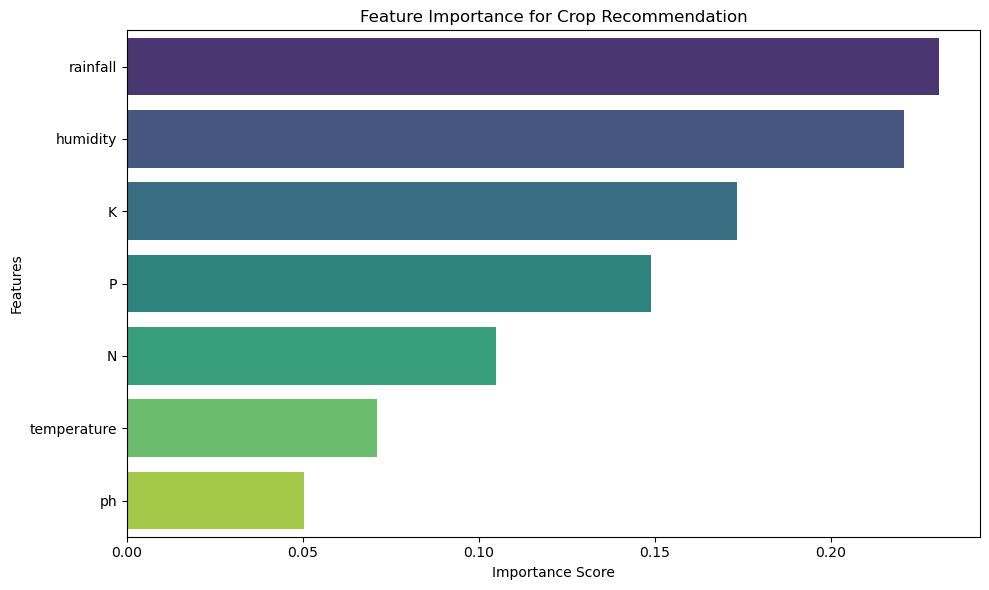

In [19]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Crop Recommendation')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [20]:


with open('crop_model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

print("\nModel and scaler saved successfully!")


Model and scaler saved successfully!


In [21]:
def predict_crop(N, P, K, temperature, humidity, ph, rainfall):

    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    probabilities = model.predict_proba(input_scaled)
    
    return prediction[0], probabilities[0]

In [22]:
sample_N = 90
sample_P = 42
sample_K = 43
sample_temp = 20.87
sample_humidity = 82.00
sample_ph = 6.50
sample_rainfall = 202.93

predicted_crop, probabilities = predict_crop(sample_N, sample_P, sample_K, 
                                              sample_temp, sample_humidity, 
                                              sample_ph, sample_rainfall)

print(f"\nExample Prediction:")
print(f"Input: N={sample_N}, P={sample_P}, K={sample_K}, Temp={sample_temp}°C, "
      f"Humidity={sample_humidity}%, pH={sample_ph}, Rainfall={sample_rainfall}mm")
print(f"Recommended Crop: {predicted_crop}")
print(f"Confidence: {max(probabilities)*100:.2f}%")


Example Prediction:
Input: N=90, P=42, K=43, Temp=20.87°C, Humidity=82.0%, pH=6.5, Rainfall=202.93mm
Recommended Crop: rice
Confidence: 87.93%


In [25]:

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_trained_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"CV Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")

train_pred = model.predict(X_trained_scaled)
train_accuracy = accuracy_score(y_train, train_pred)
print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Difference: {abs(train_accuracy - accuracy):.4f}")

Cross-validation scores: [0.99431818 0.99431818 1.         0.99715909 0.98579545]
CV Mean: 0.9943 (+/- 0.0048)

Training Accuracy: 1.0000
Test Accuracy: 0.9955
Difference: 0.0045
